# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [8]:
data = df.drop(['contact','month','day_of_week','duration'],axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   campaign        41188 non-null  int64  
 8   pdays           41188 non-null  int64  
 9   previous        41188 non-null  int64  
 10  poutcome        41188 non-null  object 
 11  emp.var.rate    41188 non-null  float64
 12  cons.price.idx  41188 non-null  float64
 13  cons.conf.idx   41188 non-null  float64
 14  euribor3m       41188 non-null  float64
 15  nr.employed     41188 non-null  float64
 16  y               41188 non-null  object 
dtypes: float64(5), int64(4), object

In [9]:
# data = data.dropna()

new_df = data
 
cat_col = data.dtypes[data.dtypes == 'O'].index.tolist() #to get the list of categorical variables

new_df.fillna("Others",inplace=True,axis = 1)

new_df = pd.get_dummies(new_df, columns=cat_col)

col_to_drop = [col for col in new_df.columns.tolist() if col.__contains__("Others")]

new_df.drop(col_to_drop, axis=1,inplace=True)

new_df

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,1,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,1,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,1,0,0,0,1,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,1,0,0,0,1,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,1,1,0,0,0,1,0,0,1
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,1,0,1,0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,1,1,0,0,0,1,0,1,0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,1,0,0,1


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
 
X = new_df.drop(['y_yes','y_no'],axis=1)
y = new_df[ 'y_yes']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 32, test_size=.3)

X_train#, 
X_test#, 
y_train#, 
y_test

# Answer check
print(  X_train.shape, X_test.shape)
print(X_train.head())
X_train.columns

(28831, 45) (12357, 45)
      age campaign pdays previous emp.var.rate cons.price.idx cons.conf.idx  \
33076  33        2   999        0         -1.8         92.893         -46.2   
1390   32        1   999        0          1.1         93.994         -36.4   
2642   43        2   999        0          1.1         93.994         -36.4   
19620  58        1   999        0          1.4         93.444         -36.1   
21929  48        1   999        0          1.4         93.444         -36.1   

      euribor3m nr.employed  job_admin.  ...  default_yes  housing_no  \
33076     1.291      5099.1           0  ...            0           0   
1390      4.855      5191.0           1  ...            0           1   
2642      4.856      5191.0           1  ...            0           1   
19620     4.968      5228.1           1  ...            0           1   
21929     4.964      5228.1           0  ...            0           0   

       housing_unknown  housing_yes  loan_no  loan_unknown  lo

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

In [11]:
 
X_train.describe()


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
count,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,...,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000
mean,0.252437,0.224446,0.035448,0.026326,0.070098,0.042212,0.034962,0.097846,0.021470,0.162429,...,0.000069,0.451840,0.023898,0.524262,0.826090,0.023898,0.150012,0.103812,0.863931,0.032257
std,0.434418,0.417224,0.184912,0.160105,0.255317,0.201075,0.183688,0.297112,0.144947,0.368851,...,0.008329,0.497684,0.152734,0.499420,0.379039,0.152734,0.357090,0.305022,0.342868,0.176685
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [12]:
 
from sklearn.dummy import DummyClassifier
 
from sklearn.model_selection import train_test_split, GridSearchCV

dummy_clf = DummyClassifier().fit(X_train, y_train)
baseline_score = dummy_clf.score(X_test, y_test)

print(baseline_score)

0.8849235251274581


In [13]:
import pandas as pd
import seaborn as sns 
from sklearn.svm import SVC 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display="diagram")
warnings.filterwarnings('ignore')

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [14]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
# instantiate the model
%time
logreg = LogisticRegression(solver='liblinear', random_state=0)
# fit the model
logreg.fit(X_train, y_train)

y_pred_test = logreg.predict(X_test)

y_pred_test.sum()





CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.91 µs


417

Text(0, 0.5, 'Frequency')

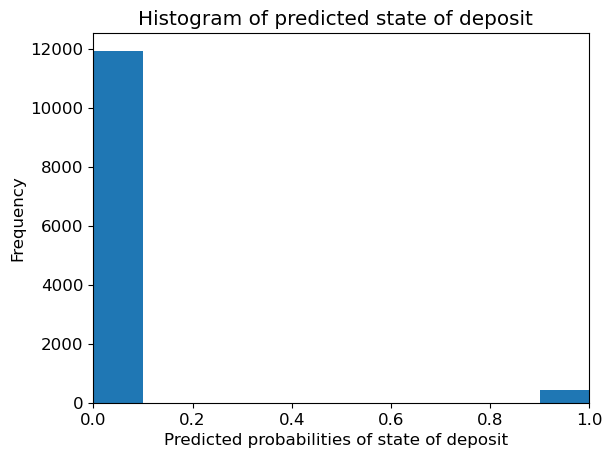

In [16]:
# plot histogram of predicted probabilities
y_pred1 = y_pred_test

# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted state of deposit  ')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of state of deposit  ')
plt.ylabel('Frequency')

### Problem 9: Score the Model

What is the accuracy of your model?

In [18]:
 
from sklearn.metrics import accuracy_score

#  instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)
# fit the model
logreg.fit(X_train, y_train)



leg_defaults = logreg.score(X_test, y_test)
print(leg_defaults)
 
logreg.predict_proba(X_test)[:,0]



print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

y_pred_train = logreg.predict(X_train)

y_pred_train

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))


0.8958485069191552
Model accuracy score: 0.8958
Training-set accuracy score: 0.9010
Training set score: 0.9010
Test set score: 0.8958


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [19]:



%time
svc = SVC().fit(X_train, y_train)
svc_defaults = svc.score(X_test, y_test)

print(svc_defaults)

print('Training set score: {:.4f}'.format(svc.score(X_train, y_train)))

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 9.06 µs
0.8940681395160638
Training set score: 0.8990


In [21]:


%time
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
knn_defaults = neigh.score(X_test, y_test)
print(knn_defaults)
print('Training set score: {:.4f}'.format(neigh.score(X_train, y_train)))

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.86 µs
0.876911871813547
Training set score: 0.9242


In [22]:

    
%time
tree_depth = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_score = tree_depth.score(X_test, y_test)
print(tree_score)
print('Training set score: {:.4f}'.format(tree_depth.score(X_train, y_train)))

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 1.67 µs
0.8956866553370559
Training set score: 0.9011


In [23]:

res_dict = {'Model': [ 'Logistic Regression', 'SVC','KNN','Decision Trees'],
             'Train time': [1,7, 2,4],
           'Train accuracy': [0.901, 0.899, 0.924,0.901],
           'Test accuracy': [0.895, 0.894, 0.876,0.895],
          }
results_df = pd.DataFrame(res_dict).set_index('Model')

print(type(results_df))
print(results_df.shape)

results_df

<class 'pandas.core.frame.DataFrame'>
(4, 3)


,Train time,Train accuracy,Test accuracy
Model,,,
Logistic Regression,1,0.901,0.895
SVC,7,0.899,0.894
KNN,2,0.924,0.876
Decision Trees,4,0.901,0.895


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [19]:
 

X1 = X_train[['age', 'job_services']]
y = y_train

def make_plot(estimator):
    xx = np.linspace(X1.iloc[:, 0].min(), X1.iloc[:, 0].max(), 50)
    yy = np.linspace(X1.iloc[:, 1].min(), X1.iloc[:, 1].max(), 50)
    XX, YY = np.meshgrid(xx, yy)
    grid = np.c_[XX.ravel(), YY.ravel()]
    labels = pd.factorize(estimator.predict(grid))[0]
    plt.contourf(xx, yy, labels.reshape(XX.shape), cmap = 'twilight', alpha = 0.6)
    sns.scatterplot(data = X1, x = 'age', y = 'job_services', hue = y,  palette = 'flare')

Pipeline(steps=[('scale', StandardScaler()),
                ('model', KNeighborsClassifier(n_neighbors=1))])


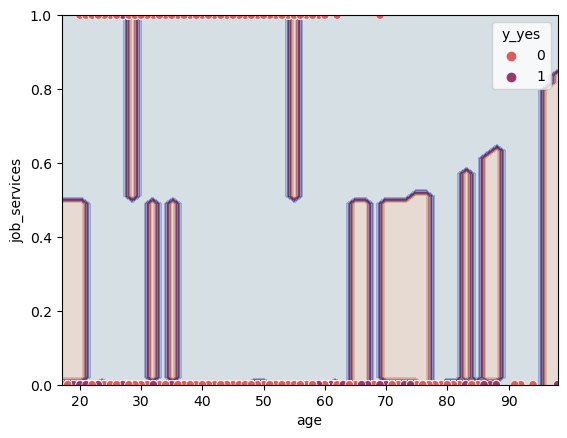

In [32]:
 
### BEGIN SOLUTION
knn_pipe_1 = Pipeline([('scale', StandardScaler()), 
                      ('model', KNeighborsClassifier(n_neighbors=1))]).fit(X1, y)
 
print(knn_pipe_1)
make_plot(knn_pipe_1)


Pipeline(steps=[('scale', StandardScaler()), ('model', KNeighborsClassifier())])


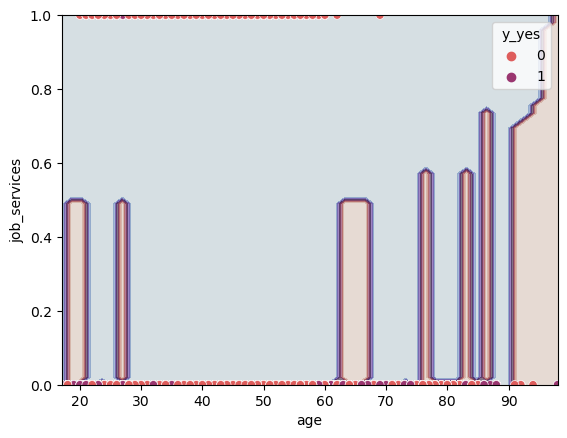

In [20]:
 
knn_pipe_5 = Pipeline([('scale', StandardScaler()), 
                      ('model', KNeighborsClassifier(n_neighbors=5))]).fit(X1, y)
 
print(knn_pipe_5)
make_plot(knn_pipe_5)

In [ ]:
# ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
#        'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
#        'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
#        'job_management', 'job_retired', 'job_self-employed', 'job_services',
#        'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
#        'marital_divorced', 'marital_married', 'marital_single',
#        'marital_unknown', 'education_basic.4y', 'education_basic.6y',
#        'education_basic.9y', 'education_high.school', 'education_illiterate',
#        'education_professional.course', 'education_university.degree',
#        'education_unknown', 'default_no', 'default_unknown', 'default_yes',
#        'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
#        'loan_unknown', 'loan_yes', 'poutcome_failure', 'poutcome_nonexistent',
#        'poutcome_success']



Pipeline(steps=[('scale', StandardScaler()), ('model', KNeighborsClassifier())])


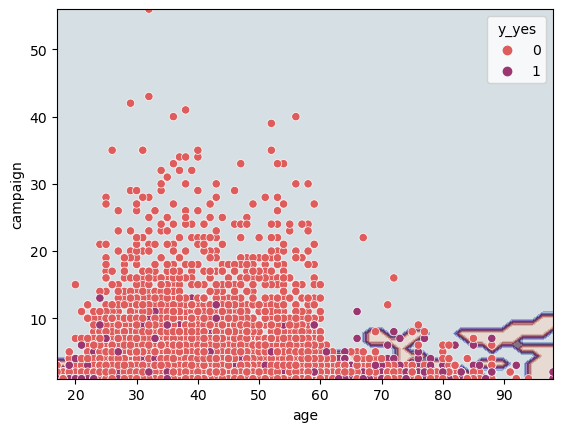

In [21]:


X1 = X_train[['age', 'campaign']]
y = y_train

def make_plot(estimator):
    xx = np.linspace(X1.iloc[:, 0].min(), X1.iloc[:, 0].max(), 50)
    yy = np.linspace(X1.iloc[:, 1].min(), X1.iloc[:, 1].max(), 50)
    XX, YY = np.meshgrid(xx, yy)
    grid = np.c_[XX.ravel(), YY.ravel()]
    labels = pd.factorize(estimator.predict(grid))[0]
    plt.contourf(xx, yy, labels.reshape(XX.shape), cmap = 'twilight', alpha = 0.6)
    sns.scatterplot(data = X1, x = 'age', y = 'campaign', hue = y,  palette = 'flare')
 
knn_pipe_5 = Pipeline([('scale', StandardScaler()), 
                      ('model', KNeighborsClassifier(n_neighbors=5))]).fit(X1, y)
 
print(knn_pipe_5)
make_plot(knn_pipe_5)

DecisionTreeClassifier()


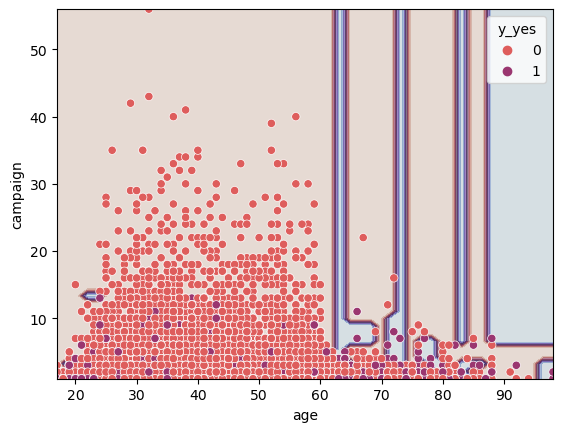

In [22]:
 
tree_depth_none = DecisionTreeClassifier(max_depth=None).fit(X1, y)
 
print(tree_depth_none)
make_plot(tree_depth_none)

In [23]:
   #'marital_divorced', 'marital_married', 'marital_single',
    
    
X1 = X_train[['marital_married', 'marital_single']]
y = y_train

def make_plot(estimator):
    xx = np.linspace(X1.iloc[:, 0].min(), X1.iloc[:, 0].max(), 50)
    yy = np.linspace(X1.iloc[:, 1].min(), X1.iloc[:, 1].max(), 50)
    XX, YY = np.meshgrid(xx, yy)
    grid = np.c_[XX.ravel(), YY.ravel()]
    labels = pd.factorize(estimator.predict(grid))[0]
    plt.contourf(xx, yy, labels.reshape(XX.shape), cmap = 'twilight', alpha = 0.6)
    sns.scatterplot(data = X1, x = 'marital_married', y = 'marital_single', hue = y,  palette = 'flare')

DecisionTreeClassifier()


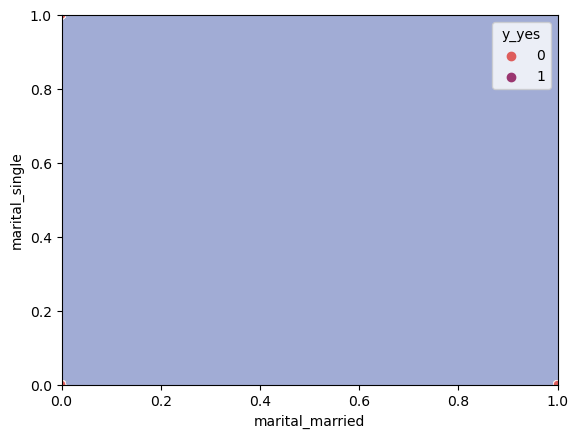

In [39]:

tree_depth_none = DecisionTreeClassifier(max_depth=None).fit(X1, y)

print(tree_depth_none)
make_plot(tree_depth_none)

In [ ]:

knn_pipe = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier())])
params = {'knn__n_neighbors': list(range(1, 22, 2))}
knn_grid = GridSearchCV(knn_pipe, param_grid=params)
knn_grid.fit(X_train, y_train)
best_k = list(knn_grid.best_params_.values())[0]
best_acc = knn_grid.score(X_test, y_test)
 
print(best_acc)
print(best_k)

In [24]:
params = {'min_impurity_decrease': [0.01, 0.02, 0.03, 0.05],
         'max_depth': [2, 5, 10],
         'min_samples_split': [0.1, 0.2, 0.05]}

grid = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid=params).fit(X_train, y_train)
grid_train_acc = grid.score(X_train, y_train)
grid_test_acc = grid.score(X_test, y_test)
best_params = grid.best_params_
 
print(f'Training Accuracy: {grid_train_acc: .2f}')
print(f'Test Accuracy: {grid_test_acc: .2f}')
print(f'Best parameters of tree: {best_params}')



Training Accuracy:  0.89
Trest Accuracy:  0.88
Best parameters of tree: {'max_depth': 2, 'min_impurity_decrease': 0.01, 'min_samples_split': 0.1}


In [24]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [25]:


# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9010


Parameters that give the best results : 

 {'C': 1000}


Estimator that was chosen by the search : 

 LogisticRegression(C=1000, random_state=0, solver='liblinear')


In [ ]:
params = {'kernel': ['rbf', 'poly'],#, 'linear', 'sigmoid'],
         'gamma': [0.1, 1.0],}#, 10.0, 100.0],}
 
grid = GridSearchCV(svc, param_grid=params).fit(X_train, y_train)
grid_score = grid.score(X_test, y_test)
 
print(grid_score)

grid.best_params_

##### Questions